In [2]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Create a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}
# (k, v): (quality values (from raw data), quality scores (will be created))

# Use pandas .map function to get quality scores [0, 5] from quality values [3, 8]
df.loc[:, 'quality'] = df.quality.map(quality_mapping)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [5]:
# Sample with frac = 1 to shuffle the df & reset indices
df = df.sample(frac = 1).reset_index(drop = True)

# Select first 1000 rows for training
df_train = df.head(1000)

# Keep the rest for testing
df_test = df.tail(599)

In [6]:
from sklearn import tree
from sklearn import metrics

# Initialize DT classifier class with max_depth = 3
clf = tree.DecisionTreeClassifier(max_depth = 3)

# Choose the features to train on for the model
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Train the model with the features and mapped quality scores
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [7]:
# Generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# Generate predictions on the testing set
test_predictions = clf.predict(df_test[cols])

# Calculate the accuracy of the predictions on the training set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# Calculate the accuracy of the predictions on the testing set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set label text size for global
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

# Ensure the plot displayed within the Notebook
%matplotlib inline

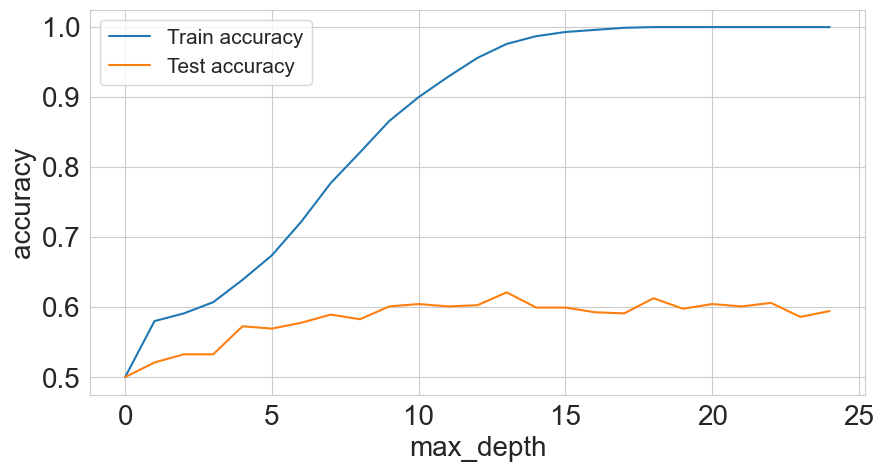

In [10]:
# Initialize accuracies as 50%
train_accuracies = [0.5]
test_accuracies = [0.5]

# Iterate over a few depth choices
for depth in range(1, 25):
    # Initalize DT classifier model with depth of choice
    clf = tree.DecisionTreeClassifier(max_depth = depth)

    # Select the feature columns
    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    
    # Fit the model on given features to target classes
    clf.fit(df_train[cols], df_train.quality)

    # Create predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # Get accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

    # Update accuracies lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Generate plots 
plt.figure(figsize = (10, 5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label = 'Train accuracy')
plt.plot(test_accuracies, label = 'Test accuracy')
plt.legend(loc = 'upper left', prop = {'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth', size = 20)
plt.ylabel('accuracy', size = 20)
plt.show()